In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import scipy

%matplotlib inline  
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

from sklearn import linear_model
import numpy.ma as ma

## Input some data and run correlations

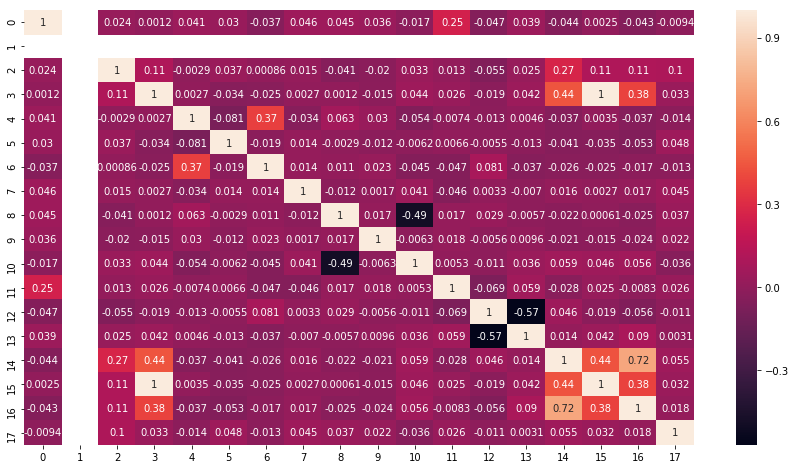

In [26]:
def convert(s):
    dict = {'пн':1, 'вт':2, 'ср':3, 'чт':4, 'пт':5, 'сб':6, 'вс':7, '-':0, '':0}
    if s in dict.keys():
        return dict[s]
    else:
        return float(s)

#dataset1
ncols=18
data = np.loadtxt('/home/dante/SHAD/dataset_16_good',delimiter='\t',converters=dict(zip(range(ncols), [convert]*ncols) ) )
dataT = data.T

ax = plt.axes()
seaborn.heatmap(np.corrcoef(dataT), annot=True, ax=ax)

In [29]:
#  dataT[1] is const==1, it has no correlation with other values
pd.Series(dataT[1]).describe()

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

In [14]:
# for visualization purposes
# pd.DataFrame(data)

## Draw some histograms

(array([   1.,    0.,    0.,    5.,    1.,    1.,    5.,    6.,    3.,
           8.,    8.,   14.,   19.,   27.,   37.,   38.,   60.,  106.,
         119.,  542.]),
 array([  1.24092134e+09,   1.24966215e+09,   1.25840296e+09,
          1.26714377e+09,   1.27588458e+09,   1.28462540e+09,
          1.29336621e+09,   1.30210702e+09,   1.31084783e+09,
          1.31958864e+09,   1.32832946e+09,   1.33707027e+09,
          1.34581108e+09,   1.35455189e+09,   1.36329270e+09,
          1.37203351e+09,   1.38077433e+09,   1.38951514e+09,
          1.39825595e+09,   1.40699676e+09,   1.41573757e+09]),
 <a list of 20 Patch objects>)

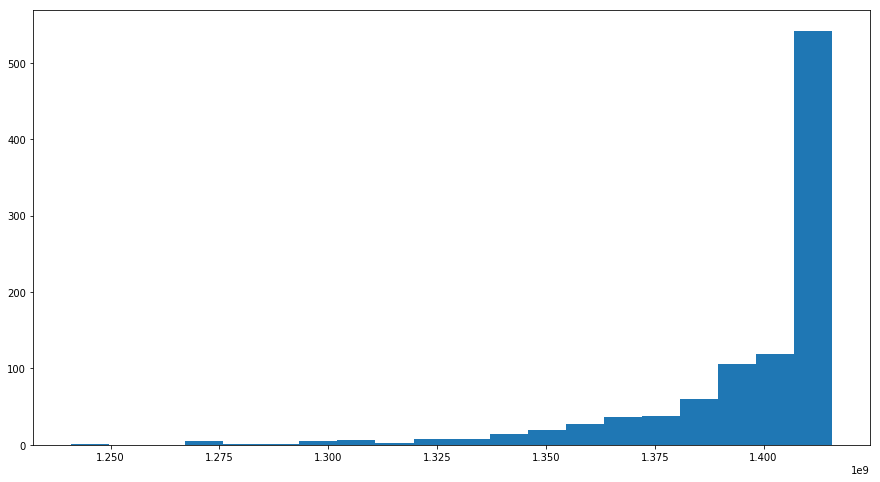

In [5]:
# plot histogram
plt.hist(dataT[8], 20)

### Problem: this histogram gives no idea about what's goint on near max value

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.,
          23.,   39.,   52.,   38.,   56.,   88.,  116.,  147.,  202.,
         175.,   60.]),
 array([  0.        ,   0.9489623 ,   1.89792459,   2.84688689,
          3.79584918,   4.74481148,   5.69377377,   6.64273607,
          7.59169836,   8.54066066,   9.48962295,  10.43858525,
         11.38754754,  12.33650984,  13.28547213,  14.23443443,
         15.18339672,  16.13235902,  17.08132132,  18.03028361,  18.97924591]),
 <a list of 20 Patch objects>)

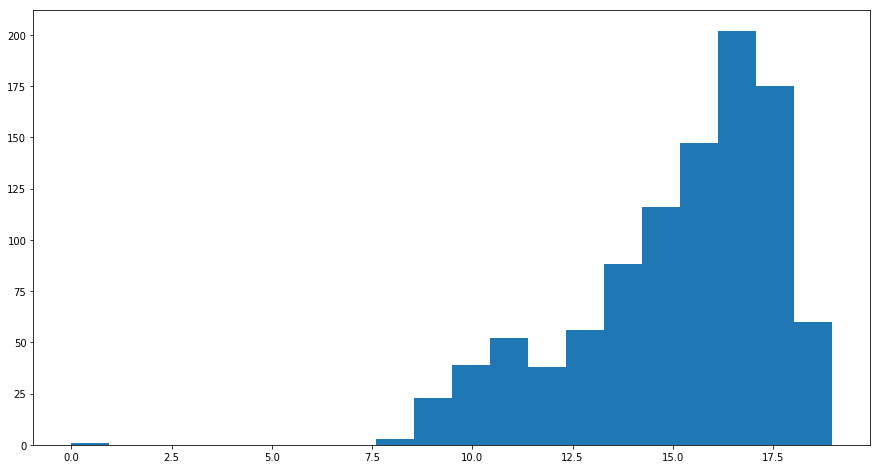

In [30]:
# Try another histogram after log-transformation

log_col = np.log(1+ max(dataT[8]) - dataT[8])
plt.hist(log_col, 20)

## Run PCA to see if we can exclude some cols

In [33]:
# https://www.clear.rice.edu/comp130/12spring/pca/pca_docs.shtml

from matplotlib.mlab import PCA

# delete cols with no variance
data2 = scipy.delete(data,1,1)

# run PCA
pca1 = PCA(data2)

# % of explained variance
print "Explained variance"
for d in pca1.fracs:
    print d

# first eigenvector
print "\n\nCoords of first eigenvector"
for i, d in enumerate(pca1.Wt[0]):
    print i, '\t', d

#print "\n\nCoords of second eigenvector"
#for d in pca1.Wt[1]:
#    print d

Explained variance
0.162909232204
0.0961964897146
0.0903390107518
0.0795366650379
0.0724194815532
0.0678208388368
0.0608106163986
0.0592239323581
0.0582234111538
0.0549020071282
0.0499441844532
0.0428196090798
0.0357436953625
0.0298848223833
0.0245472447549
0.0146554982183
2.32606107052e-05


Coords of first eigenvector
0 	0.0175003637936
1 	-0.168885692923
2 	-0.52100817987
3 	0.0278966722691
4 	0.0385363112924
5 	0.0370458791086
6 	-0.0132258736359
7 	0.0372322041519
8 	0.0223127640971
9 	-0.0726972346243
10 	-0.00921520672047
11 	0.0430394013957
12 	-0.0690254404734
13 	-0.466920469605
14 	-0.520386768301
15 	-0.437178657798
16 	-0.0458055201275


First eigenvector doesn't explain much variance (16.3% of total variance).

It correlates with columns #2, #13, #14, #15.

If we decide that 16.3% of variance is ok for us, we could drop all other columns.

(Remember that column #1 in original data was dropped before PCA, and column numbers are currently shifted!)